In [1]:
plt.style.use('bmh')
color = '#1240AB'

### Datasets preparing

In [2]:
df = pd.read_csv('data/$OCEAN tweets dataset.csv')
print(df.shape)

feats = df.notnull().sum()
feats1 = list(feats[feats > 0].index)
df = df[feats1]

del df['created_at']
del df['timezone']
# del df['id']
del df['user_id']
del df['name']
del df['thumbnail']
del df['quote_url']
del df['link']

del df['retweet']

df['date'] = pd.to_datetime(df['date'])
df.rename(columns = {'video': 'video_count'}, inplace = True)
df['tweets_count'] = 1

print(df.shape)
df[:3]

(229857, 36)
(229857, 18)


,id,conversation_id,date,time,username,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,video_count,reply_to,tweets_count
0,1583608299085500416,1583289720846618627,2022-10-22,02:56:55,mxyzptlk07,"@JakeGagain Get an $OCEAN bag, no matter how s...",en,"[{'screen_name': 'oceanprotocol', 'name': 'oce...",[],[],0,0,4,"['data', 'web3']",['ocean'],0,"[{'screen_name': 'JakeGagain', 'name': 'Jake G...",1
1,1583607565543669761,1583607565543669761,2022-10-22,02:54:00,mxyzptlk07,Great! Let's go #datascientists💪 Do you have ...,en,[],[],[],0,0,0,"['datascientists', 'buidl', 'anewdataeconomy']",['ocean'],0,[],1
2,1583603064044367872,1583603064044367872,2022-10-22,02:36:07,moonhodler2,"""The Energy Efficiency Data challenge is desig...",en,"[{'screen_name': 'oceanprotocol', 'name': 'oce...",[],[],0,0,0,['data'],['ocean'],0,[],1


In [3]:
df.date.min(), df.date.max()

(Timestamp('2019-12-31 00:00:00'), Timestamp('2022-10-22 00:00:00'))

In [4]:
df = df[df.date >= '2020-01-01']

In [5]:
def get_unflat(df, x1, x2):
    list1 = list()
    list2 = list()
    for l1,l2 in zip(df[x1], df[x2]):
        list2+=l2
        list1+=[l1]*len(l2)
    return pd.DataFrame({
        'id': list1,
        'val': list2
    })

df_tags = pd.DataFrame()
feats_list = ['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'reply_to']
for f in feats_list:
    df[f] = df[f].map(eval)
    df1 = get_unflat(df, 'id',f)
    df1['feat'] = f
    if f in ['reply_to','mentions']:
        df1['val'] = df1['val'].map(lambda x: x['screen_name'])
    del df[f]
    df_tags = pd.concat([df_tags, df1])
    
print(df_tags.shape)
df_tags[:3]

(2044201, 3)


,id,val,feat
0,1583608299085500416,oceanprotocol,mentions
1,1583603064044367872,oceanprotocol,mentions
2,1583595987851173888,emoney_com,mentions


In [6]:
print(df.shape)
df[:3]

(229824, 12)


,id,conversation_id,date,time,username,tweet,language,replies_count,retweets_count,likes_count,video_count,tweets_count
0,1583608299085500416,1583289720846618627,2022-10-22,02:56:55,mxyzptlk07,"@JakeGagain Get an $OCEAN bag, no matter how s...",en,0,0,4,0,1
1,1583607565543669761,1583607565543669761,2022-10-22,02:54:00,mxyzptlk07,Great! Let's go #datascientists💪 Do you have ...,en,0,0,0,0,1
2,1583603064044367872,1583603064044367872,2022-10-22,02:36:07,moonhodler2,"""The Energy Efficiency Data challenge is desig...",en,0,0,0,0,1


In [7]:
df_tags.feat.value_counts()

cashtags    1544064
hashtags     243593
reply_to      91581
photos        61066
urls          53405
mentions      50492
Name: feat, dtype: int64

In [8]:
# TOP tags
pd.concat([
    df_tags[df_tags.feat == 'cashtags'].val.value_counts()[:10].reset_index(),
    df_tags[df_tags.feat == 'hashtags'].val.value_counts()[:10].reset_index(),
    df_tags[df_tags.feat == 'reply_to'].val.value_counts()[:10].reset_index(),
    df_tags[df_tags.feat == 'mentions'].val.value_counts()[:10].reset_index(),
    df_tags[df_tags.feat == 'photos'].val.value_counts()[:10].reset_index(),
    df_tags[df_tags.feat == 'urls'].val.value_counts()[:10].reset_index(),
], axis = 1)

,index,val,index,val,index,val,index,val,index,val,index,val
0,ocean,238643,crypto,16075,oceanprotocol,5120,oceanprotocol,9665,https://pbs.twimg.com/media/E8-zLzFWUAEWZBY.jpg,43,https://martkist.directory,1588
1,btc,58081,bitcoin,15384,CryptoWizardd,1615,hotbit_news,2160,https://pbs.twimg.com/media/E8-zLzJWYAkFT1L.jpg,43,https://imgur.com/a/oiFpsoU,1442
2,link,55663,binance,11665,Cryptowally2,1585,whitebit6,1811,https://pbs.twimg.com/media/E8-zLzJX0AMw0WV.jpg,43,https://www.hotbit.io/exchange?symbol=MARTK_USDT,1433
3,eth,55569,btc,10048,binance,1547,coingecko,1028,https://pbs.twimg.com/media/E8-zLzKXEAYz0LE.jpg,43,http://DYOR.net,1398
4,xrp,36944,ocean,9129,davidgokhshtein,1065,brucepon,867,https://pbs.twimg.com/media/EftQbYaWkAcYTkn.jpg,23,https://faucet.martkist.digital,1127
5,dot,32049,martkist,8895,DonnieBigBags,1055,coinbase,817,https://pbs.twimg.com/media/EmvOovWXYAYpTaM.jpg,13,https://whitebit.com/trade/MARTK_USDT,1097
6,rsr,23499,defi,7829,CryptoMichNL,1016,binance,718,https://pbs.twimg.com/media/EfoXSCtWsAAgrcl.jpg,9,https://imgur.com/hUJjQA2,998
7,ada,22299,faucet,4908,oddgems,920,graviex_net,705,https://pbs.twimg.com/media/EgbIZEpXcAIF9Y1.jpg,8,https://imgur.com/a/kY0aaMq,991
8,bnb,18300,socialmedia,4872,TheMoonCarl,789,kuangex,705,https://pbs.twimg.com/media/FPbPDECaUAMufdY.jpg,8,https://cryptolume.co,798
9,coti,16568,altcoins,4473,BrucePon,734,trentmc0,620,https://pbs.twimg.com/media/Er8sNBZVcAMxSKR.jpg,7,https://www.coingecko.com/en/coins/martkist,725


In [9]:
# f1 = df_tags.feat == 'cashtags'
# f2 = df_tags.val  == 'ocean'
# df_tags[f1&f2]['id'].nunique()

In [10]:
df_tags.groupby(['id'])['feat'].nunique().sort_values(ascending = False)

id
1372933914889687043    6
1402828717999607809    6
1387470053411540994    6
1366058580684718085    6
1319730093149745152    6
                      ..
1486800645076262915    1
1358806652955348992    1
1486805792120578048    1
1486807516591923205    1
1373827222629359618    1
Name: feat, Length: 229810, dtype: int64

In [11]:
df[df['id'] == 1381345393988997125].tweet.values[0]

'@QuickswapDEX @wise_token @mudgen @0xPolygon @sandeepnailwal @fraxfinance @SergeyNazarov @MANTRADAO @SuperFarmDAO @UNCX_token @ghost_token $ORAI ✅ would be a tasty 🍪 😋 addition for your quickswap exchange @oraichain  https://t.co/YrSTfcdUNu solid partners $OCEAN $KAI $VAI and unique roadmap &amp; #aiRight #NFT connecting as first #AI #Oracle to #blockchain  https://t.co/iX8gkEQbXS'

In [12]:
# df_tags[df_tags['id'] == 1381345393988997125]

In [13]:
df_price = pd.read_csv('data/OCEAN token price dataset.csv')
df_price['date'] = pd.to_datetime(df_price['Date'])
df_price.set_index('date', inplace = True)

print(df_price.shape)
df_price[:3]

(1485, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2019-05-06,2019-05-06,0.03,0.03,0.03,0.03,0.03,409704
2019-05-07,2019-05-07,0.03,0.03,0.03,0.03,0.03,444049
2019-05-08,2019-05-08,0.03,0.03,0.03,0.03,0.03,357657


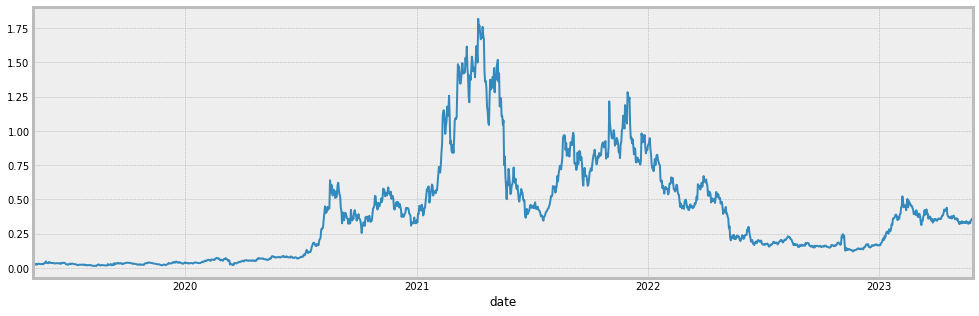

In [14]:
_ = df_price.Close.plot(figsize = (15,5))

In [15]:
df_price = df_price['2020-01-01':'2022-10-22']

In [16]:
df.to_pickle('data/df.pkl')
df_tags.to_pickle('data/df_tags.pkl')
df_price.to_pickle('data/df_price.pkl')